## Importando as Bibliotecas e a Base de Dados

In [221]:
# Importando Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [222]:
# Como a base de dados é muito grande, estou selecionando apenas algumas colunas que pretendo usar
colunas = ['NU_INSCRICAO', 'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 
'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'NO_MUNICIPIO_NASCIMENTO', 
'SG_UF_NASCIMENTO', 'TP_ESCOLA', 'IN_GESTANTE', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002']

enem = pd.read_csv(r"C:\Users\iedam\Desktop\VS Code\Projetos\Enem 2019\MICRODADOS_ENEM_2019.csv", sep=';', encoding='ISO-8859-1', usecols=colunas)

## Entendendo alguns dados

In [223]:
enem

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,...,SG_UF_NASCIMENTO,TP_ESCOLA,IN_GESTANTE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,190001595656,3552205,Sorocaba,35,SP,36.0,M,1,3,1,...,BA,1,0,NaN,NaN,NaN,NaN,NaN,B,B
1,190001421546,2910800,Feira de Santana,29,BA,23.0,M,1,1,1,...,BA,1,0,NaN,NaN,NaN,NaN,NaN,C,E
2,190001133210,2304400,Fortaleza,23,CE,39.0,F,1,3,1,...,CE,1,0,NaN,NaN,NaN,NaN,NaN,E,E
3,190001199383,1721000,Palmas,17,TO,25.0,F,1,1,1,...,TO,1,0,483.8,503.6,537.3,392.0,460.0,C,E
4,190001237802,3118601,Contagem,31,MG,22.0,F,1,1,1,...,MG,1,0,513.6,575.5,570.7,677.0,860.0,E,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095265,190006074437,5300108,Brasília,53,DF,41.0,F,4,3,1,...,PA,1,0,NaN,NaN,NaN,NaN,NaN,E,B
5095266,190005429225,1302603,Manaus,13,AM,20.0,M,1,3,1,...,AM,1,0,NaN,578.9,555.5,NaN,500.0,C,F
5095267,190006087652,4302105,Bento Gonçalves,43,RS,21.0,M,0,0,1,...,RS,1,0,NaN,NaN,NaN,NaN,NaN,E,E
5095268,190006087653,4302105,Bento Gonçalves,43,RS,22.0,M,0,0,1,...,RS,1,0,NaN,NaN,NaN,NaN,NaN,H,C


Contando a qtd de candidatos de cada cidade e organizando em ordem alfabética

In [224]:
enem['NO_MUNICIPIO_RESIDENCIA'].value_counts().sort_index()

Abadia de Goiás         283
Abadia dos Dourados     140
Abadiânia               280
Abaetetuba             6821
Abaeté                  495
                       ... 
Áurea                    68
Ângulo                   44
Érico Cardoso           127
Óbidos                 1313
Óleo                     46
Name: NO_MUNICIPIO_RESIDENCIA, Length: 5299, dtype: int64

Criando uma variável para a idade dos candidatos

In [225]:
idade = enem['NU_IDADE']

Contando a qtd de candidatos para cada idade e organizando por ordem crescente

In [226]:
idade.value_counts().sort_index()

10.0       6
11.0       9
12.0      46
13.0     266
14.0    5267
        ... 
87.0       1
88.0       1
91.0       2
92.0       1
94.0       1
Name: NU_IDADE, Length: 82, dtype: int64

Plotando um histograma para ver a distribuição de idades

<AxesSubplot:>

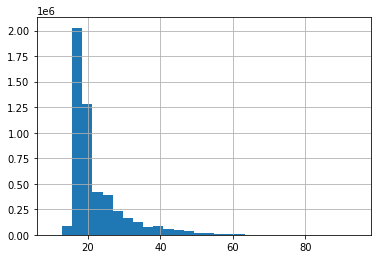

In [227]:
idade.hist(bins=30)

Criando uma variável para cada estado

In [228]:
uf_residencia = enem['SG_UF_RESIDENCIA']

Calculando a qtd de candidatos para cada estado

In [229]:
uf_residencia.value_counts()

SP    813772
MG    538896
BA    398095
RJ    338710
CE    295870
PA    281518
PE    271727
MA    219673
RS    218763
PR    210080
GO    170147
PB    147780
PI    121181
RN    119179
AM    118087
SC    109515
ES    102435
DF     94352
AL     91707
MT     88349
SE     75895
MS     70157
RO     58885
TO     47181
AP     42140
AC     38229
RR     12947
Name: SG_UF_RESIDENCIA, dtype: int64

Distribuição de cada estado

<AxesSubplot:>

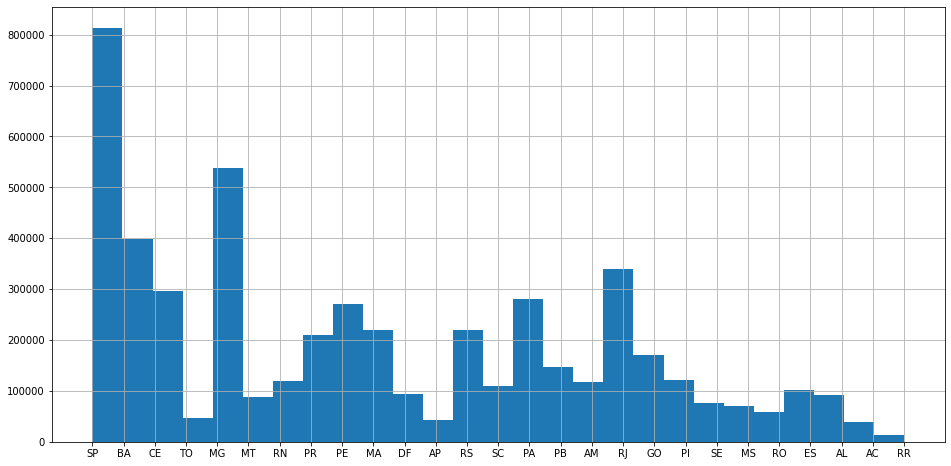

In [230]:
uf_residencia.hist(bins=27, figsize=(16,8))

## Analisando a distribuição de candidatos por sexo

Criando uma variável para as gestantes

In [231]:
gestantes = enem['IN_GESTANTE']

Quantidade de gestantes 

In [232]:
distGestante = gestantes.value_counts()
distGestante

0    5093860
1       1410
Name: IN_GESTANTE, dtype: int64

Porcentagem de gestantes sobre a população total

In [233]:
porcentGestante = [100*x/distGestante.sum() for x in distGestante]

In [234]:
porcentGestante

[99.97232727608154, 0.027672723918457705]

Quantidade de candidatos do sexo masculino e feminino

In [235]:
sexo = enem['TP_SEXO']

In [236]:
distSexo = sexo.value_counts()
distSexo

F    3031822
M    2063448
Name: TP_SEXO, dtype: int64

Porcentagem de candidatos do sexo feminino e masculino respectivamente

In [237]:
porcentSexo = [100*x/distSexo.sum() for x in distSexo]
porcentSexo

[59.50267601128105, 40.49732398871895]

Sexo feminino X Gestantes

In [238]:
sexoFeminino = distSexo[0]
nu_Gestantes = distGestante[1]

In [239]:
print(f'Sexo feminino = {sexoFeminino}')
print(f'Número de Gestantes = {nu_Gestantes}')

Sexo feminino = 3031822
Número de Gestantes = 1410


In [240]:
# Porcentagem de gestantes sobre a população de sexo feminino
porcentGestante = 100*nu_Gestantes/sexoFeminino
porcentGestante

0.04650668805754427

In [241]:
# Porcentagem de mulheres não gestantes
porcentNaoGestante = 100 - porcentGestante
porcentNaoGestante

99.95349331194245

## Analisando as notas dos candidatos por sexo

In [242]:
colunasSelecionadas = ['TP_SEXO', 'NU_NOTA_REDACAO']

Criando um novo Data Frame apenas com o sexo dos candidatos e suas notas

In [243]:
SexoRedacao = enem.filter(items=colunasSelecionadas)

In [244]:
SexoRedacao

,TP_SEXO,NU_NOTA_REDACAO
0,M,NaN
1,M,NaN
2,F,NaN
3,F,460.0
4,F,860.0
...,...,...
5095265,F,NaN
5095266,M,500.0
5095267,M,NaN
5095268,M,NaN


Removendo os valores nulos

In [245]:
SexoRedacao = SexoRedacao.dropna()

In [246]:
SexoRedacao

,TP_SEXO,NU_NOTA_REDACAO
3,F,460.0
4,F,860.0
5,M,800.0
6,F,600.0
9,M,400.0
...,...,...
5095259,F,480.0
5095260,F,460.0
5095263,F,540.0
5095264,F,280.0


Distribuição de redações por sexo

In [247]:
SexoRedacao.groupby('TP_SEXO').count()

,NU_NOTA_REDACAO
TP_SEXO,
F,2336431
M,1586713


In [248]:
SexoRedacao.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             2336431.0  577.159368  187.536483  0.0  480.0  580.0  680.0   
M             1586713.0  562.396035  190.214499  0.0  480.0  580.0  660.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0

Nota mínima maior que 0

In [249]:
SexoRedacao[SexoRedacao.NU_NOTA_REDACAO > 0].groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,40.0
M,40.0


Esse histograma mostra que as distribuições são idênticas, deixando claro que o sexo não é relevante

TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

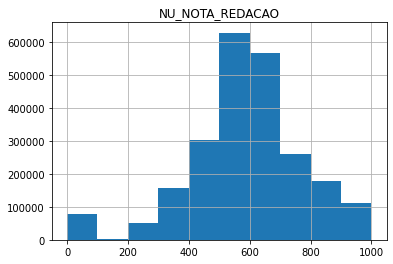

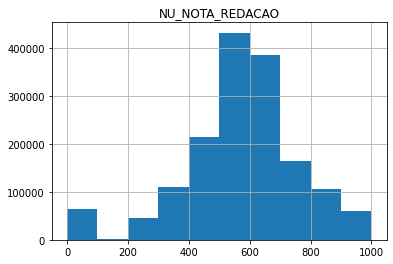

In [250]:
SexoRedacao.groupby('TP_SEXO').hist()

## Analisando as notas dos candidatos de acordo com a escolaridade dos pais

In [251]:
colsocio = ['NU_INSCRICAO', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002']

In [252]:
socioEconomico = enem.filter(items=colsocio)

In [253]:
socioEconomico.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,190001595656,NaN,NaN,B,B
1,190001421546,NaN,NaN,C,E
2,190001133210,NaN,NaN,E,E
3,190001199383,392.0,460.0,C,E
4,190001237802,677.0,860.0,E,E


Removendo os valores nulos

In [254]:
socioEconomico = socioEconomico.dropna()

In [255]:
socioEconomico.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
3,190001199383,392.0,460.0,C,E
4,190001237802,677.0,860.0,E,E
5,190001782198,675.3,800.0,B,B
6,190001421548,594.7,600.0,E,B
9,190001592266,480.7,400.0,E,E


**Passo 1 - Definindo um dicionário:**

In [256]:
q001e002Dicionario = {'A': 'Nunca estudou', 
'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental', 
'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
'G': 'Completou a Pós-graduação',
'H': 'Não sei'}

Q001                                                             | Q002
:--------------------------------------------------------------: | :-----------------------------------------------------------------:
Até que série seu pai, ou o homem responsável por você, estudou? | Até que série sua mãe, ou a mulher responsável por você, estudou?

In [257]:
socioEconomico.filter(items=['Q001', 'NU_INSCRICAO']).groupby('Q001').count()

,NU_INSCRICAO
Q001,
A,186186
B,752563
C,515785
D,433193
E,1006255
F,308319
G,193529
H,306177


**Passo 2 - Criar novas colunas no DataFrame**

In [258]:
# Inserindo coluna NO_Q001:
socioEconomico['NO_Q001'] = [q001e002Dicionario[resp] for resp in socioEconomico.Q001]

In [259]:
socioEconomico.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001
3,190001199383,392.0,460.0,C,E,"Completou a 4ª série/5º ano, mas não completou..."
4,190001237802,677.0,860.0,E,E,"Completou o Ensino Médio, mas não completou a ..."
5,190001782198,675.3,800.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...
6,190001421548,594.7,600.0,E,B,"Completou o Ensino Médio, mas não completou a ..."
9,190001592266,480.7,400.0,E,E,"Completou o Ensino Médio, mas não completou a ..."


In [260]:
# Inserindo coluna NO_Q002:
socioEconomico['NO_Q002'] = [q001e002Dicionario[resp] for resp in socioEconomico.Q002]

In [261]:
socioEconomico.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
3,190001199383,392.0,460.0,C,E,"Completou a 4ª série/5º ano, mas não completou...","Completou o Ensino Médio, mas não completou a ..."
4,190001237802,677.0,860.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
5,190001782198,675.3,800.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
6,190001421548,594.7,600.0,E,B,"Completou o Ensino Médio, mas não completou a ...",Não completou a 4ª série/5º ano do Ensino Fund...
9,190001592266,480.7,400.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."


**Passo 3 - Comparando a distribuição do nível de escolaridade Pai x Mãe no conjunto de dados**

In [262]:
# 1 - Distribuição dos candidatos do ENEM 2019 por escolaridade do Pai
socioEconomico.filter(items=['NU_INSCRICAO', 'NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending = False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",1006255
Não completou a 4ª série/5º ano do Ensino Fundamental,752563
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",515785
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",433193
"Completou a Faculdade, mas não completou a Pós-graduação",308319
Não sei,306177
Completou a Pós-graduação,193529
Nunca estudou,186186


In [263]:
# 2 - Distribuição dos candidatos do ENEM 2019 por escolaridade da Mãe
socioEconomico.filter(items=['NU_INSCRICAO', 'NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending = False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",1234774
Não completou a 4ª série/5º ano do Ensino Fundamental,551516
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",475782
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",471827
"Completou a Faculdade, mas não completou a Pós-graduação",416291
Completou a Pós-graduação,333159
Nunca estudou,121022
Não sei,97636


**Passo 4 - Olhando o desempenho em matemática segundo a escolaridade Pai x Mãe**

In [264]:
# Média da nota de Matemática por escolaridade do Pai
socioEconomico.filter(items=['NU_NOTA_MT', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending = False)

,NU_NOTA_MT
NO_Q001,
Completou a Pós-graduação,624.118011
"Completou a Faculdade, mas não completou a Pós-graduação",600.305733
"Completou o Ensino Médio, mas não completou a Faculdade",538.924218
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",515.746985
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",505.398424
Não sei,495.478053
Não completou a 4ª série/5º ano do Ensino Fundamental,486.456585
Nunca estudou,466.098351


In [265]:
# Média da nota de Matemática por escolaridade da mãe
socioEconomico.filter(items=['NU_NOTA_MT', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending = False)

,NU_NOTA_MT
NO_Q002,
Completou a Pós-graduação,598.916796
"Completou a Faculdade, mas não completou a Pós-graduação",583.324021
"Completou o Ensino Médio, mas não completou a Faculdade",528.317356
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",505.045830
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",496.050296
Não sei,484.997643
Não completou a 4ª série/5º ano do Ensino Fundamental,480.071887
Nunca estudou,459.859393


**Passo 5 - Olhando o desemprenho em redação segundo a escolaridade Pai x Mãe**

In [266]:
# Média de Redação por escolaridade do Pai
socioEconomico.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending = False)

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação,700.475174
"Completou a Faculdade, mas não completou a Pós-graduação",673.474421
"Completou o Ensino Médio, mas não completou a Faculdade",604.810272
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",574.553882
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",558.370329
Não sei,537.062092
Não completou a 4ª série/5º ano do Ensino Fundamental,532.604420
Nunca estudou,496.082520


In [267]:
# Média de Redação por escolaridade da mãe
socioEconomico.filter(items=['NU_NOTA_REDACAO', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending = False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,676.237352
"Completou a Faculdade, mas não completou a Pós-graduação",655.624887
"Completou o Ensino Médio, mas não completou a Faculdade",591.134491
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",558.917193
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",543.685715
Não completou a 4ª série/5º ano do Ensino Fundamental,522.132595
Não sei,505.266910
Nunca estudou,482.743138


## Nota Redação x Escolaridade x Estado

In [268]:
socioEconomico['SG_UF_RESIDENCIA'] = enem.SG_UF_RESIDENCIA

In [269]:
socioEconomico.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002,SG_UF_RESIDENCIA
3,190001199383,392.0,460.0,C,E,"Completou a 4ª série/5º ano, mas não completou...","Completou o Ensino Médio, mas não completou a ...",TO
4,190001237802,677.0,860.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...",MG
5,190001782198,675.3,800.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,MT
6,190001421548,594.7,600.0,E,B,"Completou o Ensino Médio, mas não completou a ...",Não completou a 4ª série/5º ano do Ensino Fund...,BA
9,190001592266,480.7,400.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...",SP


Filtrando pelo RJ

In [270]:
socioEconomico.filter(items=['NU_NOTA_REDACAO', 'NO_Q002'])\
            .where(socioEconomico.SG_UF_RESIDENCIA == 'RJ')\
            .groupby('NO_Q002')\
            .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,716.718042
"Completou a Faculdade, mas não completou a Pós-graduação",689.380171
"Completou o Ensino Médio, mas não completou a Faculdade",609.309282
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",575.725251
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",558.304487
Não completou a 4ª série/5º ano do Ensino Fundamental,535.806731
Não sei,532.756256
Nunca estudou,491.069727


Filtrando por SP

In [271]:
socioEconomico.filter(items=['NU_NOTA_REDACAO', 'NO_Q002'])\
            .where(socioEconomico.SG_UF_RESIDENCIA == 'SP')\
            .groupby('NO_Q002')\
            .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,675.865656
"Completou a Faculdade, mas não completou a Pós-graduação",658.657399
"Completou o Ensino Médio, mas não completou a Faculdade",594.542176
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",565.287715
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",551.944673
Não completou a 4ª série/5º ano do Ensino Fundamental,532.361687
Não sei,517.689578
Nunca estudou,485.318050


Analisando estado por estado

In [272]:
socioEconomico.filter(items=['SG_UF_RESIDENCIA', 'NU_NOTA_REDACAO', 'NO_Q002'])\
            .groupby(['SG_UF_RESIDENCIA', 'NO_Q002'])\
            .mean()

NU_NOTA_REDACAO
SG_UF_RESIDENCIA NO_Q002                                                            
AC               Completou a 4ª série/5º ano, mas não completou ...       525.582229
                 Completou a 8ª série/9º ano do Ensino Fundament...       531.748344
                 Completou a Faculdade, mas não completou a Pós-...       599.402473
                 Completou a Pós-graduação                                625.842014
                 Completou o Ensino Médio, mas não completou a F...       555.554088
...                                                                              ...
TO               Completou a Pós-graduação                                640.348101
                 Completou o Ensino Médio, mas não completou a F...       560.324223
                 Nunca estudou                                            467.408106
                 Não completou a 4ª série/5º ano do Ensino Funda...       496.942438
                 Não sei                                                  502.063983

[216 rows x 1 columns]

Text(0.02, 0.65, 'A : Nunca estudou\nB : Não completou a 4ª série/5º ano do Ensino Fundamental\nC : Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental\nD : Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio\nE : Completou o Ensino Médio, mas não completou a Faculdade\nF : Completou a Faculdade, mas não completou a Pós-graduação\nG : Completou a Pós-graduação\nH : Não sei\n')

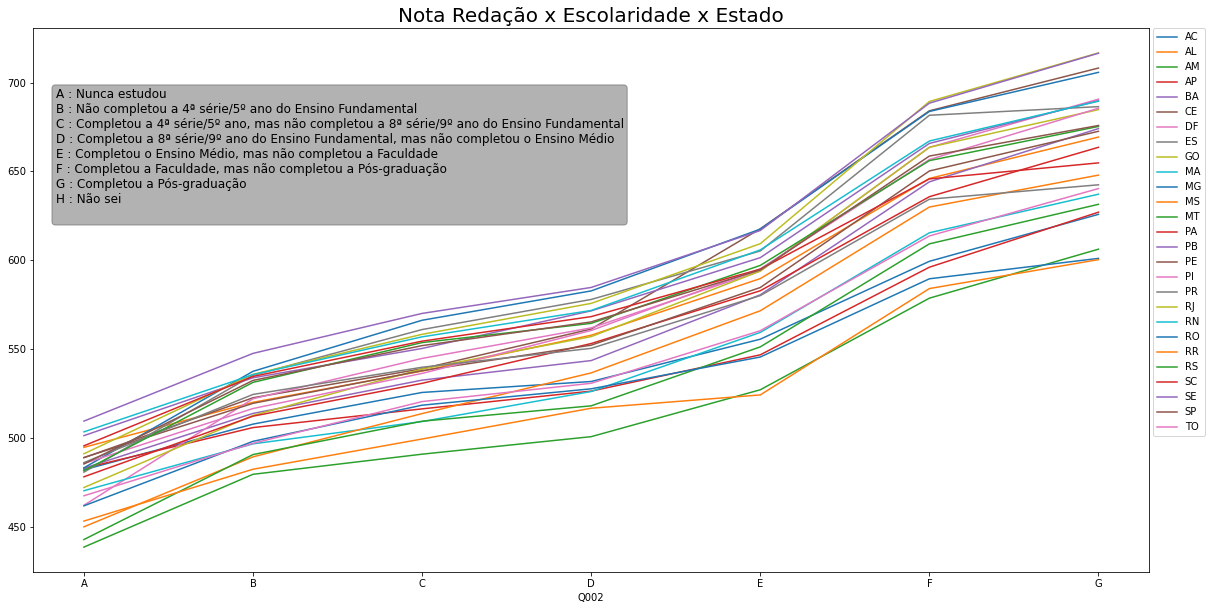

In [273]:
# Plotando o gráfico sem a alternativa H (Não sei), pois essa alternativa pode representar qualquer uma das demais alternativas

ax = socioEconomico.filter(items=['SG_UF_RESIDENCIA', 'Q002', 'NU_NOTA_REDACAO'])\
            .where(socioEconomico.Q002 != 'H')\
            .groupby(['Q002','SG_UF_RESIDENCIA'])\
            .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
            .unstack().plot(figsize = (20, 10))
            # unstack serve para separar por grupos do Groupby
ax.set_title('Nota Redação x Escolaridade x Estado', fontsize=20)

handles, labels = ax.get_legend_handles_labels()
# lables são as informações da legenda

edited_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
ax.legend(edited_labels, bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
#bbox_to_anchor é uma referência de localização dentro do gráfico

textdictQ002 = ''
for key, value in q001e002Dicionario.items():
    textdictQ002 = textdictQ002 + '{k} : {v}\n'.format(k=key, v=value)

ax.text(0.02,0.65, textdictQ002, transform = ax.transAxes, fontsize = 12,
        bbox = {'boxstyle' : 'round', 'facecolor' : 'black', 'alpha' : 0.3})


## Nota do ENEM X IDHM

In [274]:
notasEnem = enem.filter(items=['CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 
'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])

In [275]:
notasEnem

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,3552205,Sorocaba,35,SP,NaN,NaN,NaN,NaN,NaN
1,2910800,Feira de Santana,29,BA,NaN,NaN,NaN,NaN,NaN
2,2304400,Fortaleza,23,CE,NaN,NaN,NaN,NaN,NaN
3,1721000,Palmas,17,TO,483.8,503.6,537.3,392.0,460.0
4,3118601,Contagem,31,MG,513.6,575.5,570.7,677.0,860.0
...,...,...,...,...,...,...,...,...,...
5095265,5300108,Brasília,53,DF,NaN,NaN,NaN,NaN,NaN
5095266,1302603,Manaus,13,AM,NaN,578.9,555.5,NaN,500.0
5095267,4302105,Bento Gonçalves,43,RS,NaN,NaN,NaN,NaN,NaN
5095268,4302105,Bento Gonçalves,43,RS,NaN,NaN,NaN,NaN,NaN


Analisando as médias do Enem por município

In [276]:
mediaEnemPorMunicipio = notasEnem.groupby(['CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 
'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA'], as_index=False).mean()

In [277]:
mediaEnemPorMunicipio

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081
1,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147
2,1100031,Cabixi,11,RO,454.453125,474.152239,486.223881,497.443750,492.835821
3,1100049,Cacoal,11,RO,469.165657,494.664063,510.185132,510.684635,538.657074
4,1100056,Cerejeiras,11,RO,468.381164,488.456536,507.604902,505.175685,552.222222
...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis,52,GO,467.945495,492.496537,512.282684,528.815315,563.896104
5566,5222054,Vicentinópolis,52,GO,443.824194,469.941270,489.447619,504.204839,503.492063
5567,5222203,Vila Boa,52,GO,433.489130,446.955102,469.622449,474.306522,465.714286
5568,5222302,Vila Propício,52,GO,450.603636,464.472414,480.539655,474.847273,460.689655


In [278]:
mediaEnemPorMunicipio.to_csv('mediaEnemPorMunicipio')

Adicionando o IDH ao DataFrame

In [279]:
atlasHumano = pd.read_csv(r"C:\Users\iedam\Desktop\VS Code\Projetos\Enem 2019\atlas2013_dadosbrutos_pt com lat long e altura.csv", sep = ',')

In [280]:
atlasHumano.head()

,ANO,UF,Codmun6,Codmun7,Município,LONG,LAT,Alt,ESPVIDA,FECTOT,...,PIA1517,PIA18M,POP,POPT,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1991,RONDÔNIA,110001,1100015,ALTA FLORESTA D'OESTE,-61.999824,-11.935540,337.735719,62.01,4.08,...,NaN,NaN,23417,22835,0.117,0.109,0.329,0.112,0.617,0.516
1,1991,RONDÔNIA,110002,1100023,ARIQUEMES,-63.033269,-9.908463,138.688981,66.02,3.72,...,NaN,NaN,56061,55018,0.200,0.199,0.432,0.199,0.684,0.593
2,1991,RONDÔNIA,110003,1100031,CABIXI,-60.544314,-13.499763,236.063160,63.16,3.89,...,NaN,NaN,7601,5846,0.111,0.106,0.309,0.108,0.636,0.430
3,1991,RONDÔNIA,110004,1100049,CACOAL,-61.442944,-11.433865,177.453547,65.03,3.81,...,NaN,NaN,69173,66534,0.176,0.169,0.407,0.171,0.667,0.593
4,1991,RONDÔNIA,110005,1100056,CEREJEIRAS,-60.818426,-13.195033,262.811307,62.73,3.55,...,NaN,NaN,19451,19030,0.152,0.175,0.386,0.167,0.629,0.547


In [281]:
atlasHumano = atlasHumano.filter(items=['ANO', 'UF', 'Codmun7', 'Município', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R'])

In [282]:
atlasHumano

,ANO,UF,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1991,RONDÔNIA,1100015,ALTA FLORESTA D'OESTE,0.329,0.112,0.617,0.516
1,1991,RONDÔNIA,1100023,ARIQUEMES,0.432,0.199,0.684,0.593
2,1991,RONDÔNIA,1100031,CABIXI,0.309,0.108,0.636,0.430
3,1991,RONDÔNIA,1100049,CACOAL,0.407,0.171,0.667,0.593
4,1991,RONDÔNIA,1100056,CEREJEIRAS,0.386,0.167,0.629,0.547
...,...,...,...,...,...,...,...,...
16690,2010,GOIÁS,5222005,VIANÓPOLIS,0.712,0.622,0.818,0.710
16691,2010,GOIÁS,5222054,VICENTINÓPOLIS,0.684,0.562,0.804,0.707
16692,2010,GOIÁS,5222203,VILA BOA,0.647,0.534,0.818,0.619
16693,2010,GOIÁS,5222302,VILA PROPÍCIO,0.634,0.505,0.802,0.629


Fazendo um merge entre a média do Enem por município com o IDH por município

In [283]:
mediaEnem_idhm = pd.merge(mediaEnemPorMunicipio, atlasHumano, how='left', left_on=['CO_MUNICIPIO_RESIDENCIA'], right_on=['Codmun7'])

In [284]:
mediaEnem_idhm.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO,UF,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081,1991.0,RONDÔNIA,1100015.0,ALTA FLORESTA D'OESTE,0.329,0.112,0.617,0.516
1,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081,2000.0,RONDÔNIA,1100015.0,ALTA FLORESTA D'OESTE,0.483,0.262,0.698,0.617
2,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081,2010.0,RONDÔNIA,1100015.0,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657
3,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147,1991.0,RONDÔNIA,1100023.0,ARIQUEMES,0.432,0.199,0.684,0.593
4,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147,2000.0,RONDÔNIA,1100023.0,ARIQUEMES,0.556,0.343,0.742,0.674


In [285]:
mediaEnem_idhm.dtypes

CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
ANO                        float64
UF                          object
Codmun7                    float64
Município                   object
IDHM                       float64
IDHM_E                     float64
IDHM_L                     float64
IDHM_R                     float64
dtype: object

Comparando a nota de matemática com IDHM

<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='IDHM'>

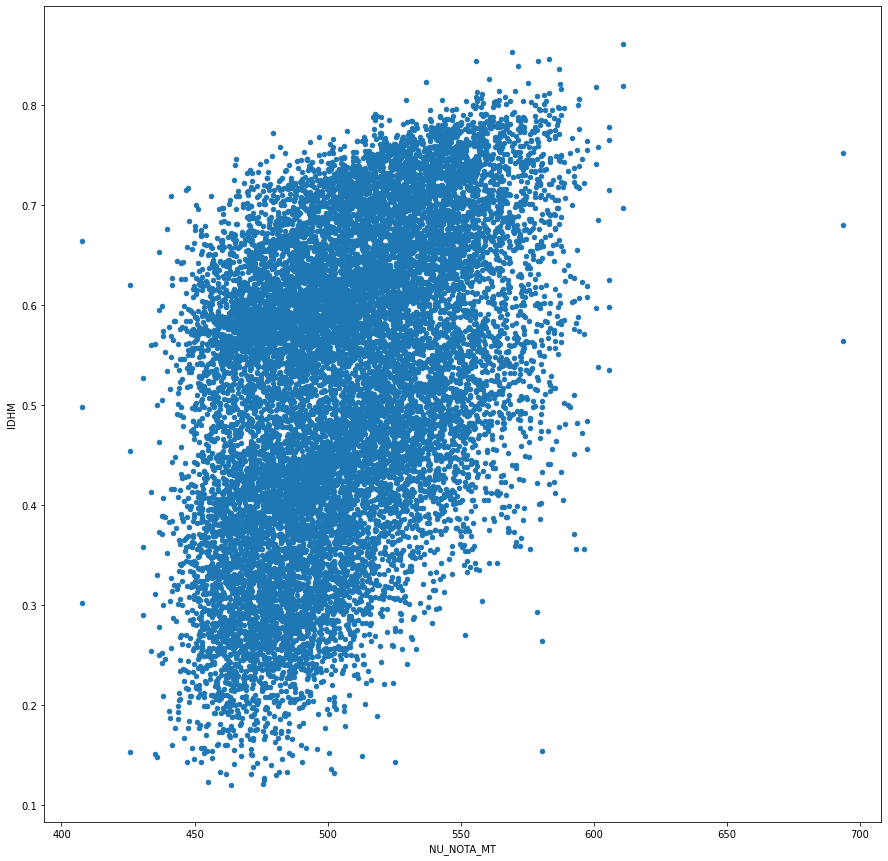

In [286]:
mediaEnem_idhm.plot.scatter('NU_NOTA_MT', 'IDHM', figsize=(15,15))

Comparando a nota da redação com IDHM

<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='IDHM'>

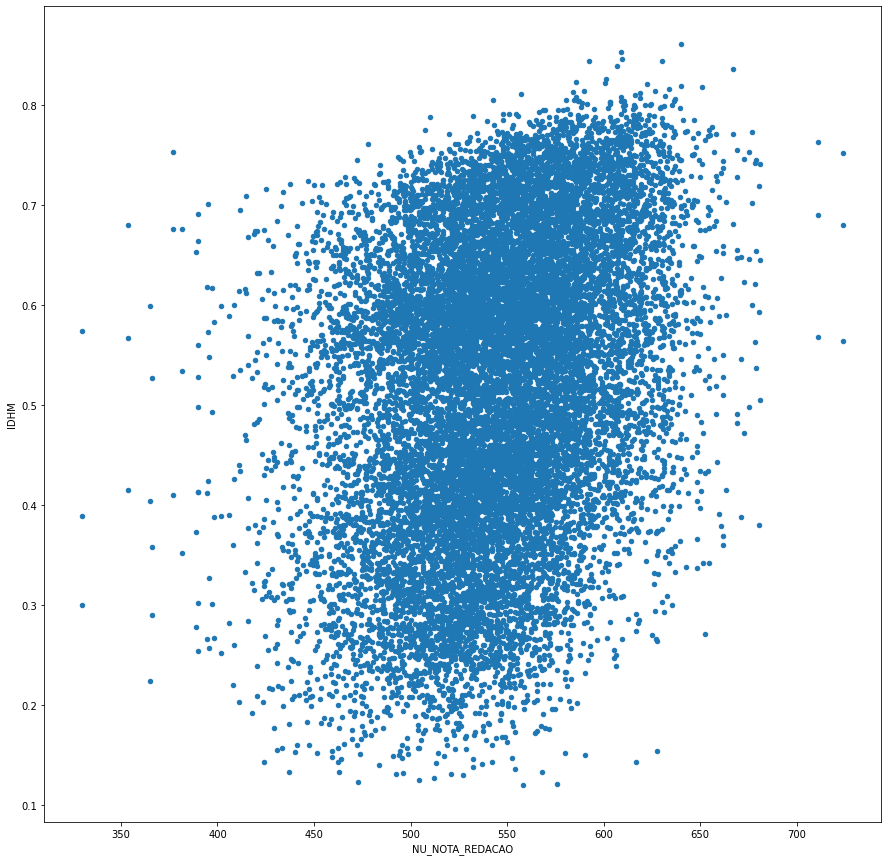

In [287]:
mediaEnem_idhm.plot.scatter('NU_NOTA_REDACAO', 'IDHM', figsize=(15,15))

Média da Redação X Média IDHM

In [288]:
media_Redacao = mediaEnem_idhm.NU_NOTA_REDACAO.mean()
media_IDHM = mediaEnem_idhm.IDHM.mean()

In [289]:
media_Redacao

544.1210797849053

In [290]:
media_IDHM

0.5213368673255465

quadrante 1 (Roxo): 27.538922155688624%, baixo IDHM, baixa nota
quadrante 2 (Preto): 21.610778443113773%, alto IDHM, baixa nota
quadrante 3 (Verde): 31.64071856287425%, alto IDHM, alta nota
quadrante 4 (Laranja): 19.179640718562876%, baixo IDHM, alta nota


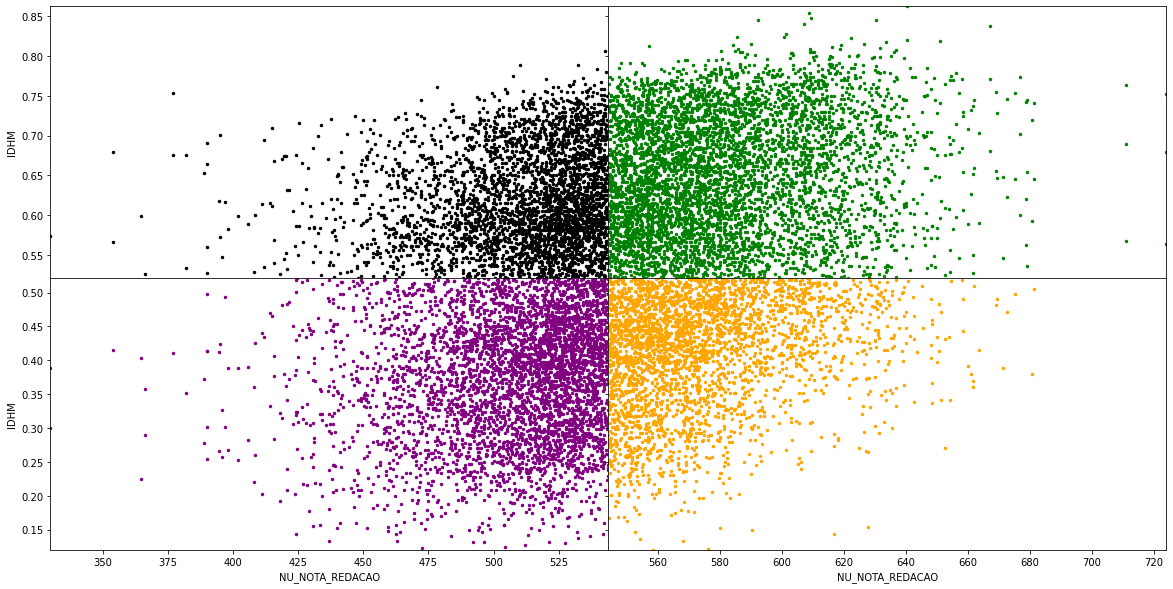

In [291]:
idhmMunicipio = mediaEnem_idhm.IDHM
notaMunicipio = mediaEnem_idhm.NU_NOTA_REDACAO

quadrante1 = (idhmMunicipio < media_IDHM) & (notaMunicipio < media_Redacao)
quadrante2 = (idhmMunicipio > media_IDHM) & (notaMunicipio < media_Redacao)
quadrante3 = (idhmMunicipio > media_IDHM) & (notaMunicipio > media_Redacao)
quadrante4 = (idhmMunicipio < media_IDHM) & (notaMunicipio > media_Redacao)

fig, ax = plt.subplots(2,2, figsize=(20,10), sharex = 'col', sharey = 'row')
plt.subplots_adjust(wspace=0, hspace=0)

minRedacao = mediaEnem_idhm.NU_NOTA_REDACAO.min()
maxRedacao = mediaEnem_idhm.NU_NOTA_REDACAO.max()
minIDHM = mediaEnem_idhm.IDHM.min()
maxIDHM = mediaEnem_idhm.IDHM.max()

mediaEnem_idhm1 = mediaEnem_idhm[quadrante1]
mediaEnem_idhm1.plot.scatter('NU_NOTA_REDACAO', 'IDHM', color='purple', s=6, ax = ax[1,0], xlim = (minRedacao, media_Redacao), ylim=(minIDHM, media_IDHM))
print('quadrante 1 (Roxo): {}%, baixo IDHM, baixa nota'.format(100*len(mediaEnem_idhm1.IDHM)/len(idhmMunicipio)))
# Para calcular a % de quanto esse quadrante representa, dividi o tamanho da coluna de IDHM que representa esse quadrante pela coluna de IDHM do DF inteiro

mediaEnem_idhm2 = mediaEnem_idhm[quadrante2]
mediaEnem_idhm2.plot.scatter('NU_NOTA_REDACAO', 'IDHM', color='black', s=6, ax = ax[0,0], xlim = (minRedacao, media_Redacao), ylim = (media_IDHM, maxIDHM))
print('quadrante 2 (Preto): {}%, alto IDHM, baixa nota'.format(100*len(mediaEnem_idhm2.IDHM)/len(idhmMunicipio)))

mediaEnem_idhm3 = mediaEnem_idhm[quadrante3]
mediaEnem_idhm3.plot.scatter('NU_NOTA_REDACAO', 'IDHM', color='green', s=6, ax = ax[0,1], xlim = (media_Redacao, maxRedacao), ylim = (media_IDHM, maxIDHM))
print('quadrante 3 (Verde): {}%, alto IDHM, alta nota'.format(100*len(mediaEnem_idhm3.IDHM)/len(idhmMunicipio)))

mediaEnem_idhm4 = mediaEnem_idhm[quadrante4]
mediaEnem_idhm4.plot.scatter('NU_NOTA_REDACAO', 'IDHM', color='orange', s=6, ax = ax[1,1], xlim = (media_Redacao, maxRedacao), ylim = (minIDHM, media_IDHM))
print('quadrante 4 (Laranja): {}%, baixo IDHM, alta nota'.format(100*len(mediaEnem_idhm4.IDHM)/len(idhmMunicipio)))

Média Matemática x Média IDHM

In [292]:
media_Mat = mediaEnem_idhm.NU_NOTA_MT.mean()
media_IDHM = mediaEnem_idhm.IDHM.mean()

In [293]:
media_Mat

506.0640816156718

quadrante 1 (Roxo): 31.62874251497006%, baixo IDHM, baixa nota
quadrante 2 (Preto): 21.131736526946106%, alto IDHM, baixa nota
quadrante 3 (Verde): 31.64071856287425%, alto IDHM, alta nota
quadrante 4 (Laranja): 15.089820359281438%, baixo IDHM, alta nota


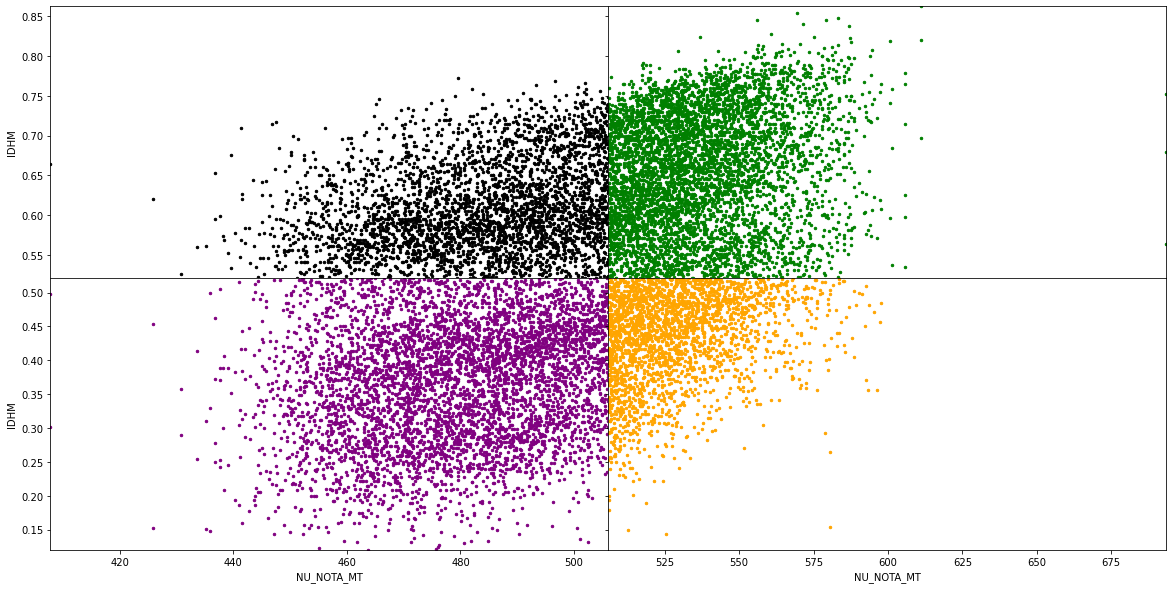

In [294]:
idhmMunicipio = mediaEnem_idhm.IDHM
notaMunicipioMat = mediaEnem_idhm.NU_NOTA_MT

quadrante1 = (idhmMunicipio < media_IDHM) & (notaMunicipioMat < media_Mat)
quadrante2 = (idhmMunicipio > media_IDHM) & (notaMunicipioMat < media_Mat)
quadrante3 = (idhmMunicipio > media_IDHM) & (notaMunicipioMat > media_Mat)
quadrante4 = (idhmMunicipio < media_IDHM) & (notaMunicipioMat > media_Mat)

fig, ax = plt.subplots(2,2, figsize=(20,10), sharex = 'col', sharey = 'row')
plt.subplots_adjust(wspace=0, hspace=0)

minMat = mediaEnem_idhm.NU_NOTA_MT.min()
maxMat = mediaEnem_idhm.NU_NOTA_MT.max()
minIDHM = mediaEnem_idhm.IDHM.min()
maxIDHM = mediaEnem_idhm.IDHM.max()

mediaEnemMat_idhm1 = mediaEnem_idhm[quadrante1]
mediaEnemMat_idhm1.plot.scatter('NU_NOTA_MT', 'IDHM', color='purple', s=6, ax = ax[1,0], xlim = (minMat, media_Mat), ylim=(minIDHM, media_IDHM))
print('quadrante 1 (Roxo): {}%, baixo IDHM, baixa nota'.format(100*len(mediaEnemMat_idhm1.IDHM)/len(idhmMunicipio)))
# Para calcular a % de quanto esse quadrante representa, dividi o tamanho da coluna de IDHM que representa esse quadrante pela coluna de IDHM do DF inteiro

mediaEnemMat_idhm2 = mediaEnem_idhm[quadrante2]
mediaEnemMat_idhm2.plot.scatter('NU_NOTA_MT', 'IDHM', color='black', s=6, ax = ax[0,0], xlim = (minMat, media_Mat), ylim = (media_IDHM, maxIDHM))
print('quadrante 2 (Preto): {}%, alto IDHM, baixa nota'.format(100*len(mediaEnemMat_idhm2.IDHM)/len(idhmMunicipio)))

mediaEnemMat_idhm3 = mediaEnem_idhm[quadrante3]
mediaEnemMat_idhm3.plot.scatter('NU_NOTA_MT', 'IDHM', color='green', s=6, ax = ax[0,1], xlim = (media_Mat, maxMat), ylim = (media_IDHM, maxIDHM))
print('quadrante 3 (Verde): {}%, alto IDHM, alta nota'.format(100*len(mediaEnem_idhm3.IDHM)/len(idhmMunicipio)))

mediaEnemMat_idhm4 = mediaEnem_idhm[quadrante4]
mediaEnemMat_idhm4.plot.scatter('NU_NOTA_MT', 'IDHM', color='orange', s=6, ax = ax[1,1], xlim = (media_Mat, maxMat), ylim = (minIDHM, media_IDHM))
print('quadrante 4 (Laranja): {}%, baixo IDHM, alta nota'.format(100*len(mediaEnemMat_idhm4.IDHM)/len(idhmMunicipio)))

Adicionando o Dataset que contém a latitude e longitude de cada município

In [295]:
municipios = pd.read_csv(r"C:\Users\iedam\Desktop\VS Code\Projetos\Enem 2019\municipios.csv")

In [296]:
municipios

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo
...,...,...,...,...,...,...,...,...,...
5565,2933604,Xique-Xique,-10.82300,-42.7245,0,29,3971,74,America/Sao_Paulo
5566,2517407,Zabelê,-8.07901,-37.1057,0,25,542,83,America/Sao_Paulo
5567,3557154,Zacarias,-21.05060,-50.0552,0,35,2973,18,America/Sao_Paulo
5568,2114007,Zé Doca,-3.27014,-45.6553,0,21,1287,98,America/Sao_Paulo


In [297]:
enem_idh_municipios = pd.merge(mediaEnem_idhm, municipios,
how='left', left_on=['CO_MUNICIPIO_RESIDENCIA'], right_on=['codigo_ibge'])

In [298]:
enem_idh_municipios

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO,...,IDHM_R,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081,1991.0,...,0.516,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11,33,69,America/Porto_Velho
1,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081,2000.0,...,0.617,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11,33,69,America/Porto_Velho
2,1100015,Alta Floresta D'Oeste,11,RO,466.877454,493.412214,504.998473,503.000000,555.776081,2010.0,...,0.657,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11,33,69,America/Porto_Velho
3,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147,1991.0,...,0.593,1100023,Ariquemes,-9.90571,-63.0325,0,11,7,69,America/Porto_Velho
4,1100023,Ariquemes,11,RO,463.542845,489.960333,506.999802,498.971037,524.149147,2000.0,...,0.674,1100023,Ariquemes,-9.90571,-63.0325,0,11,7,69,America/Porto_Velho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16695,5222302,Vila Propício,52,GO,450.603636,464.472414,480.539655,474.847273,460.689655,2000.0,...,0.539,5222302,Vila Propício,-15.45420,-48.8819,0,52,1068,62,America/Sao_Paulo
16696,5222302,Vila Propício,52,GO,450.603636,464.472414,480.539655,474.847273,460.689655,2010.0,...,0.629,5222302,Vila Propício,-15.45420,-48.8819,0,52,1068,62,America/Sao_Paulo
16697,5300108,Brasília,53,DF,492.786286,523.134671,535.237884,536.788562,585.451783,1991.0,...,0.762,5300108,Brasília,-15.77950,-47.9297,1,53,9701,61,America/Sao_Paulo
16698,5300108,Brasília,53,DF,492.786286,523.134671,535.237884,536.788562,585.451783,2000.0,...,0.805,5300108,Brasília,-15.77950,-47.9297,1,53,9701,61,America/Sao_Paulo


<AxesSubplot:title={'center':'Nota da Redação'}, xlabel='longitude', ylabel='latitude'>

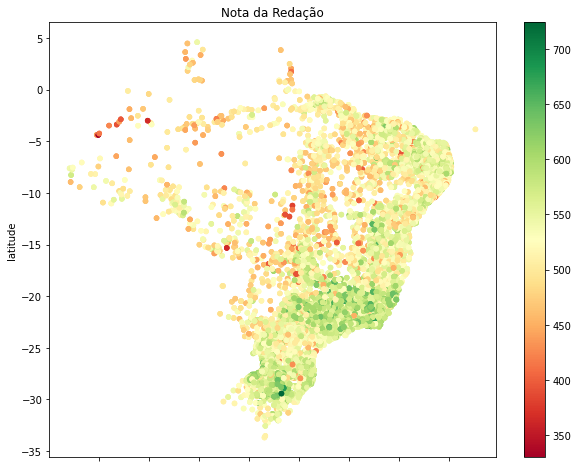

In [299]:
enem_idh_municipios.plot.scatter(y='latitude', x='longitude',
c=enem_idh_municipios['NU_NOTA_REDACAO'],
cmap='RdYlGn', figsize=(10,8), title='Nota da Redação')

<AxesSubplot:title={'center':'Nota de Matemática'}, xlabel='longitude', ylabel='latitude'>

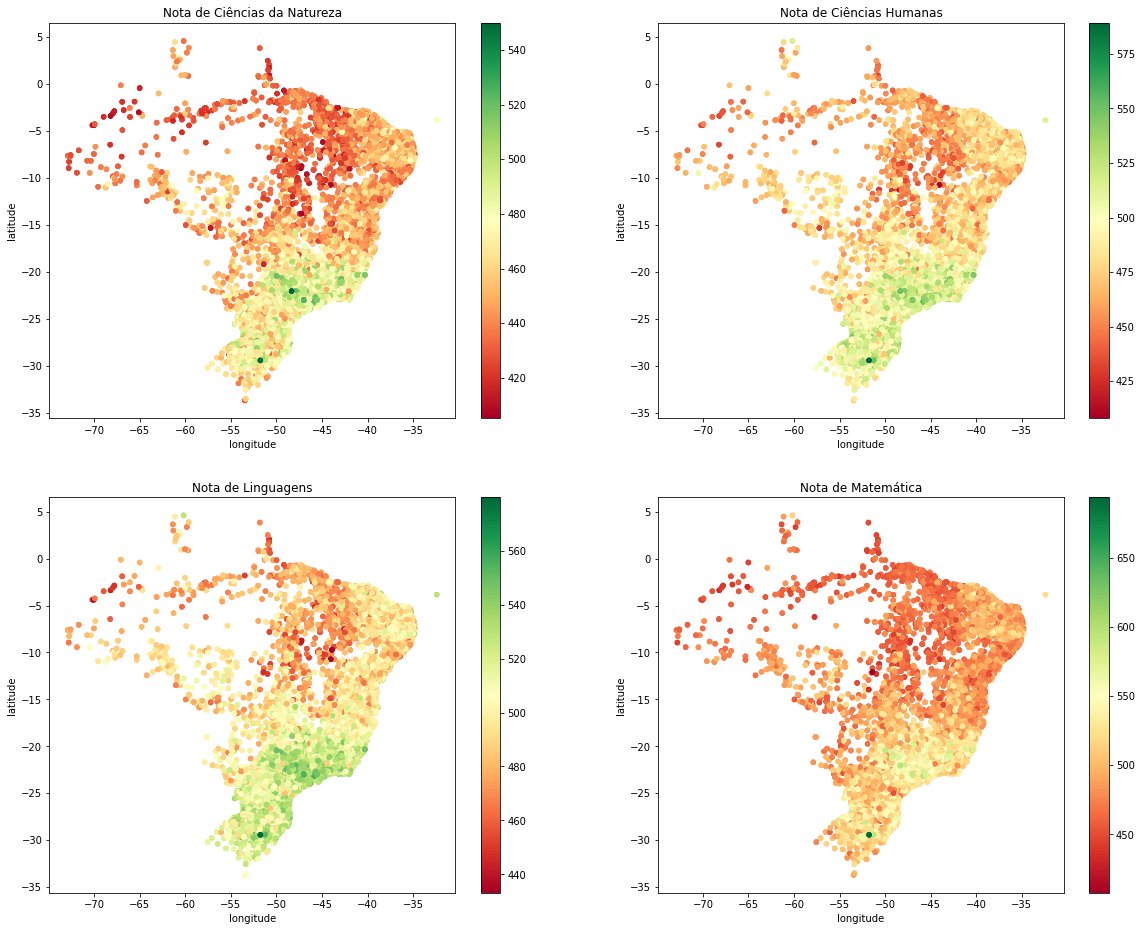

In [300]:
fig, ax = plt.subplots(2,2, figsize = (20,16))

enem_idh_municipios.plot.scatter(y='latitude', x='longitude',
c=enem_idh_municipios['NU_NOTA_CN'],
cmap='RdYlGn', title='Nota de Ciências da Natureza', ax=ax[0,0])

enem_idh_municipios.plot.scatter(y='latitude', x='longitude',
c=enem_idh_municipios['NU_NOTA_CH'],
cmap='RdYlGn', title='Nota de Ciências Humanas', ax=ax[0,1])

enem_idh_municipios.plot.scatter(y='latitude', x='longitude',
c=enem_idh_municipios['NU_NOTA_LC'],
cmap='RdYlGn', title='Nota de Linguagens', ax=ax[1,0])

enem_idh_municipios.plot.scatter(y='latitude', x='longitude',
c=enem_idh_municipios['NU_NOTA_MT'],
cmap='RdYlGn', title='Nota de Matemática', ax=ax[1,1])

<AxesSubplot:title={'center':'IDHM_L'}, xlabel='longitude', ylabel='latitude'>

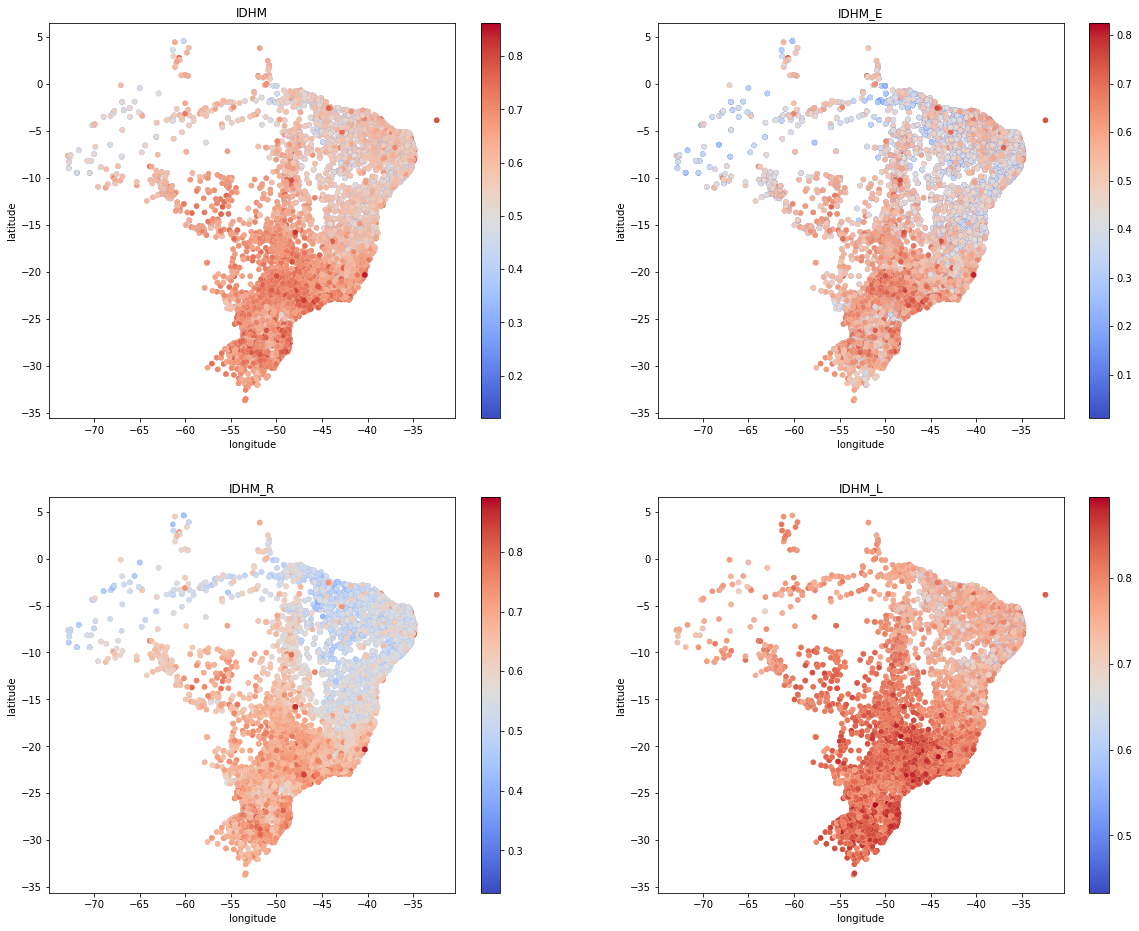

In [301]:
fig, ax = plt.subplots(2,2, figsize = (20,16))

enem_idh_municipios.plot.scatter(y='latitude', x='longitude',
c=enem_idh_municipios['IDHM'],
cmap='coolwarm', title='IDHM', ax=ax[0,0])

enem_idh_municipios.plot.scatter(y='latitude', x='longitude',
c=enem_idh_municipios['IDHM_E'],
cmap='coolwarm', title='IDHM_E', ax=ax[0,1])

enem_idh_municipios.plot.scatter(y='latitude', x='longitude',
c=enem_idh_municipios['IDHM_R'],
cmap='coolwarm', title='IDHM_R', ax=ax[1,0])

enem_idh_municipios.plot.scatter(y='latitude', x='longitude',
c=enem_idh_municipios['IDHM_L'],
cmap='coolwarm', title='IDHM_L', ax=ax[1,1])